In [1]:
# Lab 2 with solutions (10 Jan 2018) 

# Units of variables given in the dataset:
#    elevation: meters above sea level
#    g: mm water equivalent per meter (db/dz)
#    continentality: degrees Celsius
#    cloud cover: percentage
#    summer temperature: degrees Celsius
#    precipitation: mm per year
#    average winter precipitation: mm per month 

# NOTE: climate variables are given from climatological gridded data (CRU) provided for the whole globe on ca 50x50 km grid
#
# Variables:
#                       g: [1x136 double]  glacier mass balance gradient (as an average over the observed period)
#        median_elevation: [1x136 double]  Median glacier elevation (derived from glacier hypsometry: glacier area vs elevation)
#      summer_temperature: [1x136 double]  Summer near-surface air temperature over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#           precipitation: [1x136 double]  Total annaul precipitation over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#                     lat: [1x136 double]  Geographical latitude of the glacier (in degrees)
#           max_elevation: [1x136 double]  Maximum glacier elevation
#                 WGMS ID: [1x136 int64]   Given glacier ID (from World Glacier Monitoring Service)
#    winter_precipitation: [1x136 double]  Same as for precipation but derived only over winter months 
#                     lon: [1x136 double]  Geographical longitude of the glacier (in degrees)
#             cloud_cover: [1x136 double]  Annual cloud cover over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#          continentality: [1x136 double]  Maximum monthly temperature minus minimum monthly temperature over a year (over a grid cell covering the glacier and averaged over the observed period). The larger the continentality index the climate is more continental (rather than maritime). 



In [1]:
#import all required libraries etc

from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import itertools

In [2]:
#run notebook with functions we'll need

%run ./Lab2_2019_functions.ipynb

In [3]:
#load the data and check it out

data = pd.read_csv('glaciers.csv')
data.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,8.102728,1071.00,7.626667,483.990,-54.78,1172.5,36.273333,-68.40,63.393750,8.395
1,1.860170,2660.00,11.663333,1637.810,47.04,2950.0,91.578333,12.97,61.731667,18.830
2,9.194071,2560.00,14.881667,1521.845,47.48,2910.0,83.785000,13.62,61.529583,20.045
3,4.162200,3039.75,11.683333,1550.760,46.80,3715.5,93.790000,10.77,62.957083,18.725
4,4.411077,2795.00,10.561667,1726.480,46.85,3140.0,110.065000,10.15,64.265417,17.855


In [4]:
#clean data -- g<0 is non physical and this data point should be removed

data = data.drop(np.argwhere(data['g']<0)[0])

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [5]:
#normalize data and check it out

data_norm = (data - data.mean())/data.std()
data_norm.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,0.729295,-1.127617,-0.610002,-1.008986,-4.510634,-1.305564,-0.826765,-0.917411,-0.073330,-1.567918
1,-1.252792,0.077903,0.303656,0.634920,-0.009790,0.000761,0.080425,0.221562,-0.285946,-0.270948
2,1.075809,0.002036,1.032093,0.469699,0.009659,-0.028636,-0.047412,0.230660,-0.311797,-0.119936
3,-0.521870,0.366006,0.308183,0.510896,-0.020399,0.563344,0.116703,0.190768,-0.129189,-0.283999
4,-0.442849,0.180323,0.054305,0.761253,-0.018189,0.140396,0.383669,0.182089,0.038174,-0.392131


Text(0.5, 1.0, 'Visualizing Normalization')

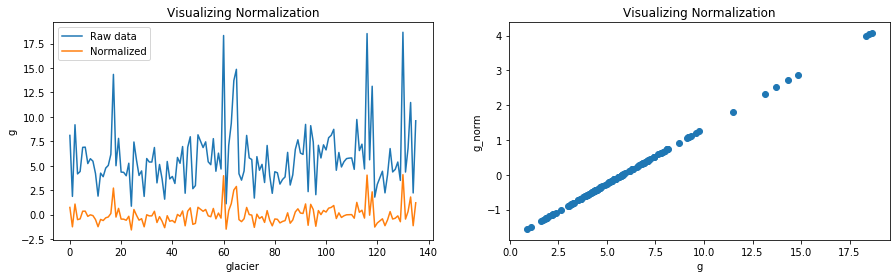

In [7]:
#visualize normalization

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(data['g'])
plt.plot(data_norm['g'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('g')
plt.xlabel('glacier')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(data['g'],data_norm['g'])
plt.ylabel('g_norm')
plt.xlabel('g')
plt.title('Visualizing Normalization')

In [8]:
#unpack data
lat = data_norm['lat']
lon = data_norm['lon']
hmax = data_norm['max_elevation']
hmed = data_norm['median_elevation']
g = data_norm['g']
Pannual = data_norm['precipitation']
Pwinter = data_norm['winter_precipitation']
CI = data_norm['continentality']
cloud = data_norm['cloud_cover']
Tsummer = data_norm['summer_temperature']

In [9]:
#target variable: y; predictor variable(s): x

y = g
X = data_norm.drop('g',axis=1)

SOLUTIONS:

Apply MLR to standardized input

In [10]:
#make MLR model, fit to the data, and predict y

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,y) #R-squared value from MLR model

Text(0.5, 1.0, 'MLR Model Results: R^2 = 0.38')

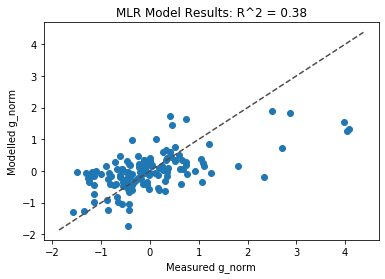

In [12]:
#visualize MLR model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_MLR)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('MLR Model Results: R^2 = ' + str(R2_MLR)[:4])

Apply stepwise regression on standardized input

In [13]:
#use stepwise regression to find which predictors to use

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  continentality                 with p-value 3.75066e-10
resulting features:
['continentality']


/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [14]:
#do MLR using predictors chosen from stepwise regression

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],y) #R-squared value from MLR model


Text(0.5, 1.0, 'Stepwise Model Results: R^2 = 0.25')

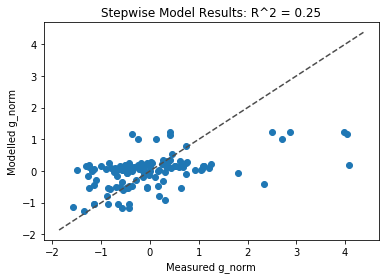

In [15]:
#visualize stepwise model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_step)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('Stepwise Model Results: R^2 = ' + str(R2_step)[:4])

Apply calibration - validation approach on standardized input

In [17]:
#goal: loop through every combination of normalized predictors, make linear model, and find one with best performance

R2_best = []
combo_best = []

for kk in range(1,10): #for each total number of predictors to use in model (from 1 predictor to 9 predictors)
    
    v0 = range(np.shape(X)[1])
    combinations = list(itertools.combinations(range(np.shape(X)[1]),kk)) #all possible combinations of kk total predictors 
    R2_test = []
    
    for ind in range(len(combinations)): #for each combination of predictors, make MLR model and compute R^2

        test_vars = np.array(combinations[ind])
        X_test = X.iloc[::2,test_vars]
        y_test = y.iloc[::2]
        
        X_valid = X.iloc[1::2,test_vars]
        y_valid = y.iloc[1::2]

        lm_test = linear_model.LinearRegression()
        model_test = lm_test.fit(X_test,y_test)
        ypred_test = lm_test.predict(X_test) #y predicted by MLR
        R2_test.append(lm_test.score(X_valid,y_valid)) #R-squared value from MLR model

    R2_best.append(np.max(R2_test))
    combo_best.append(combinations[np.argmax(R2_test)])
    
R2_best_final = np.max(R2_best)
combo_best_final = combo_best[np.argmax(R2_best)]

print('The best combination of predictors is: ' )
print(list(X.columns[np.asarray(combo_best_final)]))

The best combination of predictors is: 
['median_elevation', 'lat', 'max_elevation', 'cloud_cover']
R^2 = 0.28


In [21]:
#build linear model using the best combination of predictors

X_calib_valid = X.iloc[:,np.asarray(combo_best_final)]

lm_calib_valid = linear_model.LinearRegression()
model_calib_valid = lm_calib_valid.fit(X_calib_valid,y)
ypred_calib_valid = lm_calib_valid.predict(X_calib_valid) #y predicted by MLR
intercept_calib_valid = lm_calib_valid.intercept_ #intercept predicted by MLR
coef_calib_valid = lm_calib_valid.coef_ #regression coefficients in MLR model
R2_calib_valid = lm_calib_valid.score(X_calib_valid,y) #R-squared value from MLR model

Text(0.5, 1.0, 'Calibration-Validation Model Results: R^2 = 0.32')

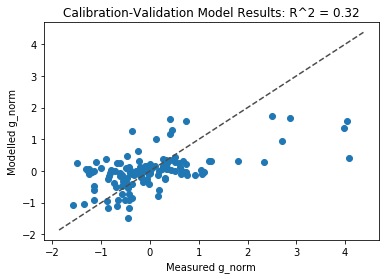

In [22]:
#visualize calibration-validation model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_calib_valid)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured g_norm')
plt.ylabel('Modelled g_norm')
plt.title('Calibration-Validation Model Results: R^2 = ' + str(R2_calib_valid)[:4])

In [ ]:
#Answers to the specific questions:

# 1) How well can the spatial variability in mass balance gradient be represented by a multiple linear
# regression (MLR) using all the plausible predictors from the given dataset?
# Answer: R^2 is a metric of the goodness of the fit, which is the same as correlation 
# coefficient squared.  In this case, R^2 = 0.38 (38% variance is expained by the MLR model)

#2) What is the optimal number of predictors in MLR and how much variance in mass balance gradient
# can be explained by this MLR?
# Answers: According to the stepwise regression there is only one optimal predictor : CI (continentality index)
# With this one predictor, the model explains 25% of the variance (R^2 = 0.25)
# According to the calibration-validation approach optimal number of preditors is 4: latitude, max elevation, median elevation, cloud cover
# With this four-predictor model R^2 = 0.32 (32% variance is explained)

# 3) Plot modelled (regressed) mass balance gradients versus observed ones and discuss whether the
# linear model is successful or not (hint: is the model robust, is it resistant to outliers?) 
# The plots are provided and no obvius outliers are indicated in the scatter plot
# There seems to be a tendency for the model (in all three cases above) to 
# underestimate large mass balance gradients